# Initial baseline classifer using ROCKET using active avoidance
### [Paper link](https://link.springer.com/article/10.1007/s10618-020-00701-z)
### Paper abstract  
| Most methods for time series classification that attain state-of-the-art accuracy have high computational complexity, requiring significant training time even for smaller datasets, and are intractable for larger datasets. Additionally, many existing methods focus on a single type of feature such as shape or frequency. Building on the recent success of convolutional neural networks for time series classification, we show that simple linear classifiers using random convolutional kernels achieve state-of-the-art accuracy with a fraction of the computational expense of existing methods. Using this method, it is possible to train and test a classifier on all 85 ‘bake off’ datasets in the UCR archive in 
, and it is possible to train a classifier on a large dataset of more than one million time series in approximately 1 h.


In [1]:
%load_ext autoreload
%autoreload 2

In [8]:
from pathlib import Path
import numpy as np
from sktime.classification.kernel_based import RocketClassifier

from transphorm.experiments.rocket.rocket import *

from sklearn.metrics import f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import get_scorer
from sklearn.model_selection import learning_curve
from tsai.models.ROCKET_Pytorch import ROCKET, create_rocket_features

NameError: name 'ROCKET' is not defined

In [10]:
active_avoidance_main_path= Path(
        "/Users/mds8301/Desktop/temp/dopamine_full_timeseries_array.pt"
    )
data = load_py_data_to_np(active_avoidance_main_path)[:,::2000]
data.shape

(88, 752)

In [46]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data_reproduce(data)

X_train = torch.from_numpy(X_train)
X_train = X_train.view(-1, 1, seq_len)

In [47]:
c_in = 1
seq_len = X_train.shape[1]
n_kernels = 10
rocket = ROCKET(c_in, seq_len, n_kernels=n_kernels)
rocket

# X_train = X_rain.shape()


rocket.forward(X_train)

ValueError: 'a' cannot be empty unless no samples are taken

In [29]:
rocket_classifier = RocketClassifier(
    num_kernels=500, 
    rocket_transform='rocket', 
    use_multivariate='no', 
    n_jobs=4
)
rocket_classifier.fit(X_train, y_train)

RocketClassifier(n_jobs=4, num_kernels=500, use_multivariate='no')

In [48]:
rocket_classifier.__dir__()


['num_kernels',
 'rocket_transform',
 'max_dilations_per_kernel',
 'n_features_per_kernel',
 'use_multivariate',
 'n_jobs',
 'random_state',
 'classes_',
 'n_classes_',
 'fit_time_',
 '_class_dictionary',
 '_threads_to_use',
 '_X_metadata',
 '_estimator_type',
 '_is_vectorized',
 '_converter_store_y',
 '_is_fitted',
 '_tags_dynamic',
 '_config_dynamic',
 'multivar_rocket_',
 'univar_rocket_',
 '_y_metadata',
 '_y_inner_mtype',
 '__module__',
 '__doc__',
 '_tags',
 'VALID_ROCKET_STRINGS',
 'VALID_MULTIVAR_VALUES',
 '__init__',
 'estimator_',
 '_get_delegate',
 'get_test_params',
 '_delegate_name',
 '_fit',
 '_predict',
 '_predict_proba',
 '_get_fitted_params',
 'METADATA_REQ_IN_CHECKS',
 'VECTORIZATION_ATTR',
 'TASK',
 'EST_TYPE',
 'EST_TYPE_PLURAL',
 '__rmul__',
 '__or__',
 'fit',
 'predict',
 'predict_proba',
 'fit_predict',
 '_fit_predict_boilerplate',
 '_subset',
 '_pool',
 'fit_predict_proba',
 '_single_class_y_pred',
 'score',
 '_vectorize',
 '_check_convert_X_for_predict',
 '_che

In [33]:
train_scores, validation_scores = validation_curve(rocket_classifier, X_train, y_train, param_name='num_kernels', param_range=range(100,500, 100))

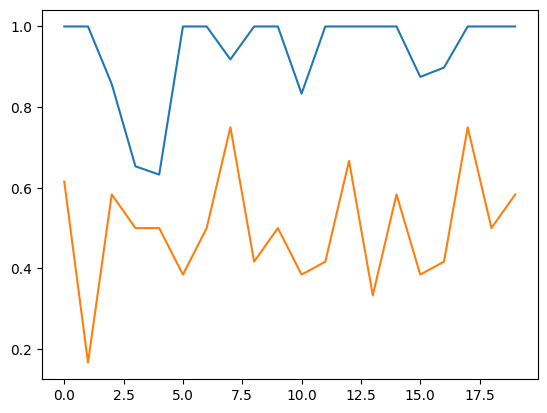